In [1]:
# Compare Algorithms
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
# load dataset
df=pd.read_excel('hierfornoisy.xlsx')
df.head()

,r_new,cluster
0,0.454303,10
1,0.590000,9
2,0.455694,8
3,0.453976,8
4,0.454600,8


In [2]:
#df.drop(columns=['Unnamed: 2','Unnamed: 3'],axis=0, inplace=True)
array = df.values
irr=df['r_new']
tar=df['cluster']
x=array[:,0:]
y=array[:,1]

# RF

In [3]:
rf=RandomForestClassifier()
rf.fit(x,y)
rf_score=cross_val_score(rf,x,y,cv=10,scoring='accuracy',)
rf_score.mean()

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.9714285714285715

In [4]:
rf_ypred=cross_val_predict(rf,x,y,cv=10)

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [5]:
confusion_matrix(y,rf_ypred)

array([[ 7,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  7,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  7,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 19,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0]], dtype=int64)

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


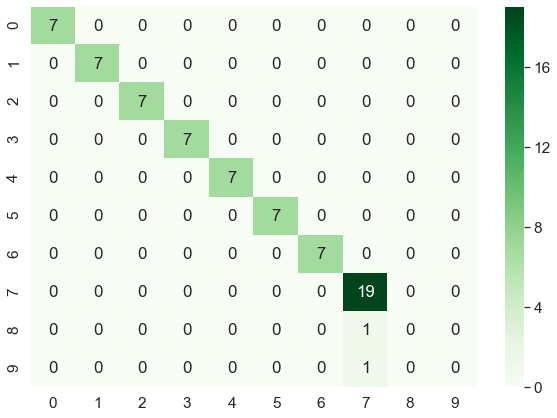

In [6]:
import seaborn as sn
import numpy as np
data = confusion_matrix(y,rf_ypred)
df_cm = pd.DataFrame(data, columns=np.unique(y), index = np.unique(y))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(data, cmap="Greens", annot=True)# font size

In [7]:
precision_score(y,rf_ypred,average='weighted')

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.945578231292517

In [8]:
recall_score(y,rf_ypred,average='weighted')

0.9714285714285714

In [9]:
f1_score(y,rf_ypred,average='weighted')

0.9578571428571429

# CART

In [10]:
dt=DecisionTreeClassifier()
dt.fit(x,y)
dt_score=cross_val_score(dt,x,y,cv=10,scoring='accuracy')
dt_score.mean()

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.9714285714285715

In [11]:
dt_ypred=cross_val_predict(dt,x,y,cv=10)

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [12]:
confusion_matrix(y,dt_ypred)

array([[ 7,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  7,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  7,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 19,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0]], dtype=int64)

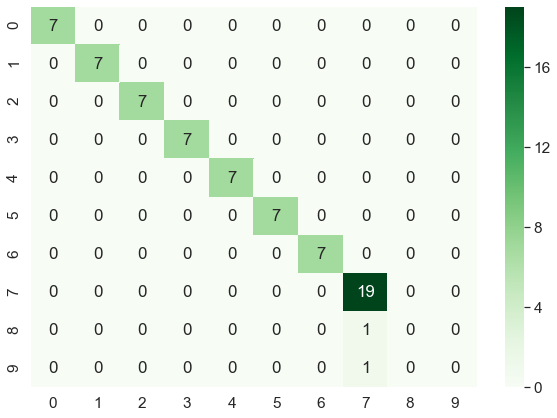

In [13]:
data = confusion_matrix(y,dt_ypred)
df_cm = pd.DataFrame(data, columns=np.unique(y), index = np.unique(y))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(data, cmap="Greens", annot=True)# font size

In [14]:
precision_score(y,dt_ypred,average='weighted')

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.945578231292517

In [15]:
recall_score(y,dt_ypred,average='weighted')

0.9714285714285714

In [16]:
f1_score(y,dt_ypred,average='weighted')

0.9578571428571429

# Naive Bayes

In [17]:
nb=GaussianNB()
nb.fit(x,y)
nb_score=cross_val_score(dt,x,y,cv=10,scoring='accuracy')
nb_score.mean()

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.9714285714285715

In [18]:
nb_ypred=cross_val_predict(nb,x,y,cv=10)

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [19]:
confusion_matrix(y,nb_ypred)

array([[ 7,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  7,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  7,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 19,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0]], dtype=int64)

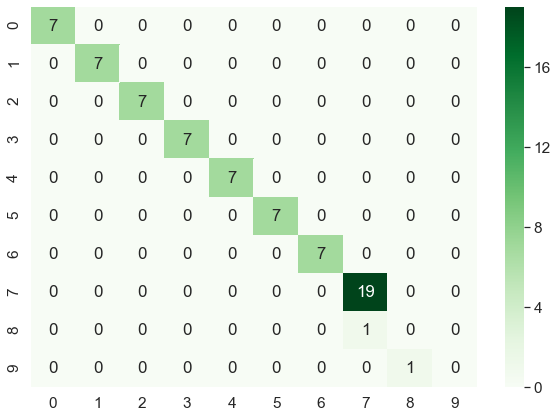

In [20]:
data = confusion_matrix(y,nb_ypred)
df_cm = pd.DataFrame(data, columns=np.unique(y), index = np.unique(y))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(data, cmap="Greens", annot=True)# font size

In [21]:
precision_score(y,nb_ypred,average='weighted')

C:\Users\zahid.hussain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9578571428571429

In [22]:
recall_score(y,nb_ypred,average='weighted')

0.9714285714285714

In [23]:
f1_score(y,nb_ypred,average='weighted')

0.9644688644688645

In [25]:
df['cluster'].value_counts

<bound method IndexOpsMixin.value_counts of 0     10
1      9
2      8
3      8
4      8
      ..
65     1
66     1
67     1
68     1
69     1
Name: cluster, Length: 70, dtype: int64>